### Suicide Rates Overview 1985 to 2016 
###### https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
from matplotlib.pyplot import figure


This dataset shows the number of suicides happening in each country since the 1987 based on different criteries like Age, sex, income and generation.
- Our story will have different parts:
    - how suicides numbers changed over time (did it increase, decreased or stayed the same)
    - Is there an association between the age and the tendency for suicide.
    - Is there an association between the gender and the tendency for suicide.
    - Top/Bottom 20 countries with highest/lowest suicides numbers.
        - relation with gdb per capita
        - categorizing countries to (low/mid-low/mid-high/high) income.
        - note: using data for the last 10 years for the gdb part (since it can be more accurate)

In [2]:
df_suicide = pd.read_csv('Suicide_Dataset_Kaggle.csv')

In [3]:
df_suicide.head(20)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,NaN,"2,156,624,900",796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,NaN,"2,156,624,900",796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X


In [4]:
df_suicide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [5]:
df_suicide.shape

(27820, 12)

In [6]:
# The only column with Null values is {HDI for Year} lets check its content
df_suicide['HDI for year'].value_counts()

0.888    84
0.772    84
0.713    84
0.830    72
0.793    72
         ..
0.614    12
0.728    12
0.522    12
0.879    12
0.924    12
Name: HDI for year, Length: 305, dtype: int64

Columns to drop:
- HDI for year (missing alot of values)
- country-year	(duplicate of other columns)
- gdp_for_year since we already have gdp_per_capita

In [7]:
df_suicide.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [8]:
df_suicide = df_suicide.drop(columns={'HDI for year','country-year',' gdp_for_year ($) '})

### 1- How suicides numbers changed overtime

In [9]:
suicidal_n_years = df_suicide.groupby(['year'])['suicides_no'].sum().reset_index()

In [10]:
suicidal_n_years

,year,suicides_no
0,1985,116063
1,1986,120670
2,1987,126842
3,1988,121026
4,1989,160244
5,1990,193361
6,1991,198020
7,1992,211473
8,1993,221565
9,1994,232063


It looks like that Year 2016 information is not completed 
,for the sake of understanding the trend it will be removed from the original data and the grouped one

In [11]:
suicidal_n_years = suicidal_n_years.iloc[0:31]
df_suicide =df_suicide[df_suicide['year']!=2016]

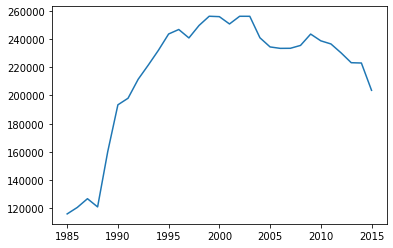

In [12]:
plt.plot(suicidal_n_years['year'], suicidal_n_years['suicides_no'] )

- It looks like that the number of suicides increased sharply between the end of the 80's till mid of the 90's.
- After the 80's it stayed stable then it decreased after 2002

##### Important : Just looking at numbers can be deceiving since the population increased alot since the past so a normalized number is better. Lucky for us we have suicides/100k pop.

In [13]:
suicidal_n_years_100k = df_suicide.groupby(['year'])['suicides/100k pop'].mean().reset_index()

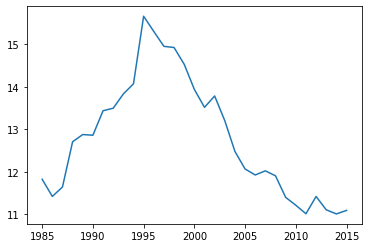

In [14]:
plt.plot(suicidal_n_years_100k['year'], suicidal_n_years_100k['suicides/100k pop'] )

So, now we can see that the number increased as before between the 80s abd the mid 90's then they decreased alot.
Some Hypothesis:
- After 2000 mental health issues and visiting psychologist became more normal than before, also, the number of associations that are preventing people from doing suicides are more, and other awareness channels.
- The low numbers at the 80s and the begining of the 90s can be analyzed in two ways:
    - People were happier than the mid- end of 90's
    - Data was not collected as much as now in many countries 

### 2- Is there an association between the age and the tendency for suicide.

In [15]:
df_suicide['age'].value_counts()

75+ years      4610
35-54 years    4610
5-14 years     4610
25-34 years    4610
15-24 years    4610
55-74 years    4610
Name: age, dtype: int64

In [16]:
suicide_age_n=df_suicide.groupby(['age'])['suicides/100k pop'].mean().reset_index()

In [17]:
suicide_age_n = suicide_age_n.sort_values(by=['suicides/100k pop'])

([0, 1, 2, 3, 4, 5], <a list of 6 Text xticklabel objects>)

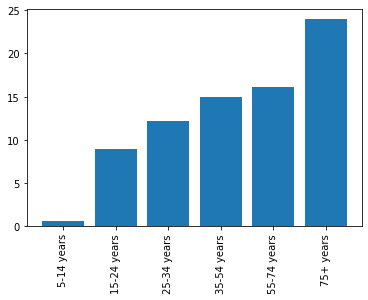

In [18]:
plt.bar(suicide_age_n['age'],suicide_age_n['suicides/100k pop'])
plt.xticks(rotation=90)


Looking at the numbers/100k it is clear that the number of suicides for older people is higher than the younger ones.
Of course alot reasons and research is done is this area however multiple assumptions:
- people after 20s get more responsibility (Work, Family, Money, Future) they break with time.
- older people above 70 get sick and lonely.

### 2.1 Looking at age with time

In [19]:
suicide_age_year_n=df_suicide.groupby(['year','age'])['suicides/100k pop'].mean().reset_index()

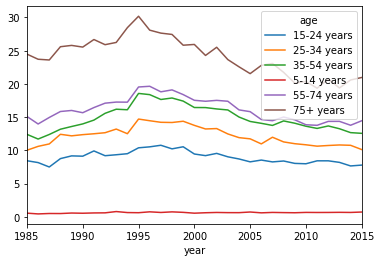

In [20]:
suicide_age_year_n.pivot(index='year', columns='age', values='suicides/100k pop').plot()



There is nothing special found from this relation it matches what we had in part 1

### 3- Relation of suicides with sex

In [21]:
df_suicide['sex'].value_counts()

male      13830
female    13830
Name: sex, dtype: int64

In [22]:
df_suicide_gender = df_suicide.groupby('sex')['suicides/100k pop'].mean().reset_index()

In [23]:
df_suicide_gender

,sex,suicides/100k pop
0,female,5.396188
1,male,20.229007


In [24]:
df_suicide_gender['suicides/100k pop'].iloc[1]/df_suicide_gender['suicides/100k pop'].iloc[0]

3.7487586641596753

<BarContainer object of 2 artists>

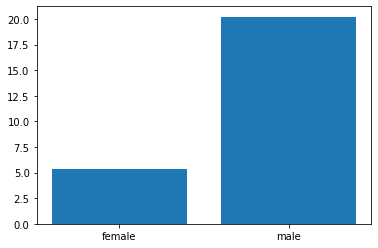

In [25]:
plt.bar(df_suicide_gender['sex'],df_suicide_gender['suicides/100k pop'])

Male are more likely (4 times) to commit suicide than female. This can be because:
- Percentage of male in the population is higher
- Male are less likely to express there feelings and seek help when needed.

### 3.1 Lets associate this factor with the previous ones (age,time)

In [26]:
df_suicide_age_sex_time = df_suicide.groupby(['year','age','sex'])['suicides/100k pop'].sum().reset_index()

In [27]:
df_suicide_age_sex_time_male = df_suicide_age_sex_time[df_suicide_age_sex_time['sex']=='male']

In [28]:
df_suicide_age_sex_time_male.head()

,year,age,sex,suicides/100k pop
1,1985,15-24 years,male,581.40
3,1985,25-34 years,male,733.31
5,1985,35-54 years,male,910.76
7,1985,5-14 years,male,35.14
9,1985,55-74 years,male,1073.94


In [29]:
df_suicide_age_sex_time_female = df_suicide_age_sex_time[df_suicide_age_sex_time['sex']=='female']

In [30]:
df_suicide_age_sex_time_female.head()

,year,age,sex,suicides/100k pop
0,1985,15-24 years,female,227.85
2,1985,25-34 years,female,227.53
4,1985,35-54 years,female,279.93
6,1985,5-14 years,female,16.42
8,1985,55-74 years,female,375.12


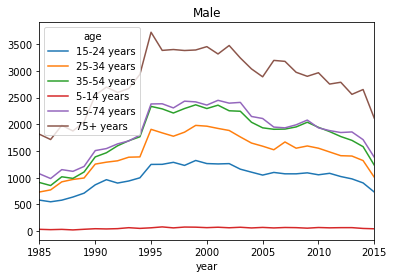

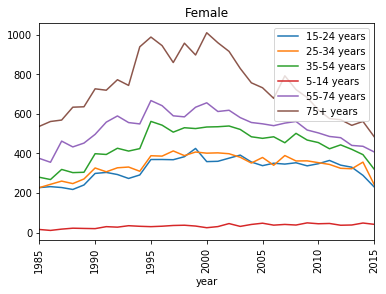

In [31]:
df_suicide_age_sex_time_male.pivot(index='year', columns='age', values='suicides/100k pop').plot()
plt.title ('Male')
df_suicide_age_sex_time_female.pivot(index='year', columns='age', values='suicides/100k pop').plot()
plt.title ('Female')


plt.xticks(rotation=90)
plt.legend()


These charts are similar to what we had in the first graph, however, there are two things to note:
- In Female graph ages 25-34 and 15-24 are mostly overlapping which mean number ratios are very similar in contrast to male.
- In male group ages 35-54 and 55-74 are similar

### 4- Countries and suicides 

In [32]:
df_suicide['country'].nunique()

100

In [33]:
# 100 countries are alot to show in the same graph, so we will focus on top 20 and lowest 20
df_suicide_countries = df_suicide.groupby(['country'])['suicides/100k pop'].sum().reset_index()

In [34]:
df_suicide_countries = df_suicide_countries.sort_values(by=['suicides/100k pop'])

In [35]:
df_suicide_countries.head(10)

,country,suicides/100k pop
75,Saint Kitts and Nevis,0.00
27,Dominica,0.00
64,Oman,26.50
95,United Arab Emirates,94.89
45,Jamaica,106.44
14,Bosnia and Herzegovina,110.81
17,Cabo Verde,133.84
78,San Marino,145.62
55,Maldives,164.08
54,Macau,171.74


<Figure size 1440x1280 with 0 Axes>

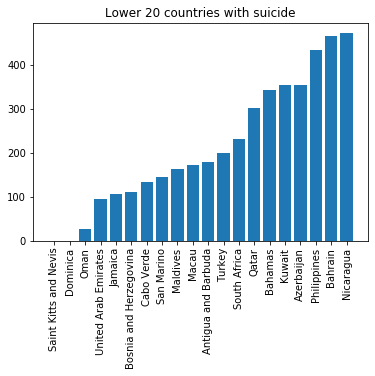

<Figure size 1440x1280 with 0 Axes>

In [36]:
plt.bar(df_suicide_countries['country'].iloc[0:20],df_suicide_countries['suicides/100k pop'].iloc[0:20])
plt.xticks(rotation=90)
plt.title('Lower 20 countries with suicide')
figure(num=None, figsize=(18, 16), dpi=80, facecolor='w', edgecolor='k')

In [37]:
df_suicide_countries.tail(10)

,country,suicides/100k pop
12,Belgium,7900.50
32,Finland,7924.11
46,Japan,8025.23
6,Austria,8893.00
94,Ukraine,8931.66
72,Republic of Korea,9350.45
47,Kazakhstan,9519.52
40,Hungary,9914.73
52,Lithuania,10227.16
74,Russian Federation,11305.13


Text(0.5, 1.0, 'Upper 20 countries with suicide')

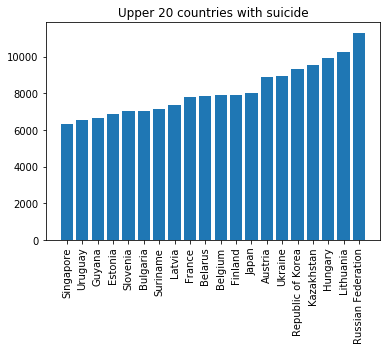

In [38]:
plt.bar(df_suicide_countries['country'].iloc[80:],df_suicide_countries['suicides/100k pop'].iloc[80:])
plt.xticks(rotation=90)
plt.title('Upper 20 countries with suicide')




Looking at the two graphs without any other association does not give a clear insight, however, one thing noticed is that countries at the lower 20 contains some countries that are considered more relgious which may effect suicide rates to be less

### 4.1- Looking at suicide numbers and countries relation gdp per capita

In [39]:
df_suicide_countries_gdb = df_suicide.groupby(['country'])['suicides/100k pop','gdp_per_capita ($)'].mean().reset_index()

In [40]:
df_suicide_countries_gdb = df_suicide_countries_gdb.sort_values(by=['suicides/100k pop'])

In [41]:
mean = np.mean(df_suicide_countries_gdb['gdp_per_capita ($)'], axis=0)
sd = np.std(df_suicide_countries_gdb['gdp_per_capita ($)'], axis=0)

In [42]:
df_suicide_countries_gdb.shape

(100, 3)

In [43]:
#removing outliers from the gdb to calculate mean of top 50 and lower 50
df_suicide_countries_gdb = df_suicide_countries_gdb.loc[(df_suicide_countries_gdb['gdp_per_capita ($)'] < mean+2*sd)]
df_suicide_countries_gdb = df_suicide_countries_gdb.loc[(df_suicide_countries_gdb['gdp_per_capita ($)'] > mean-2*sd)]

In [44]:
df_suicide_countries_gdb.shape

(94, 3)

In [45]:
#countries with less suicide rates
print(df_suicide_countries_gdb['gdp_per_capita ($)'].iloc[0:50].mean())
#countries with more suicide rates
print(df_suicide_countries_gdb['gdp_per_capita ($)'].iloc[51:].mean())

10086.41141946421
16977.152602340746


#### Whats interesting is that the average gdb per capita for countries that have more suicides is higher which contradict the assumption that countries with lower gdb per capita have people with more tendency to suicide, HOWEVER, the average can't give the real story even without outliers.

Text(0.5, 1.0, 'Upper 20 countries with suicides numbers')

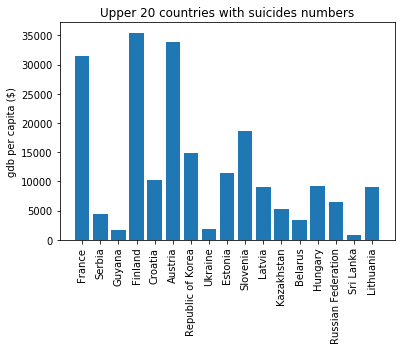

In [46]:
plt.bar(df_suicide_countries_gdb['country'].iloc[77:],df_suicide_countries_gdb['gdp_per_capita ($)'].iloc[77:])
plt.xticks(rotation=90)
plt.ylabel('gdb per capita ($)')
plt.title('Upper 20 countries with suicides numbers')

Text(0.5, 1.0, 'lower 20 countries with suicides numbers')

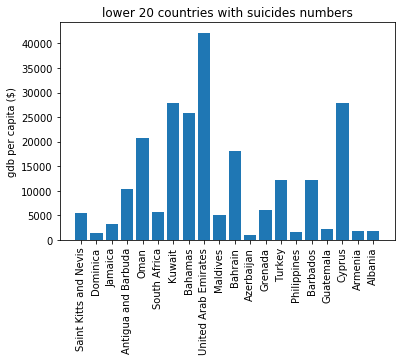

In [47]:
plt.bar(df_suicide_countries_gdb['country'].iloc[0:20],df_suicide_countries_gdb['gdp_per_capita ($)'].iloc[0:20])
plt.xticks(rotation=90)
plt.ylabel('gdb per capita ($)')
plt.title('lower 20 countries with suicides numbers')

### 4.2 - Data for the last available 10 years

In [48]:
df_suicide_2005 = df_suicide[df_suicide['year']>2005]

In [49]:
df_suicide_countries_gdb_last_10 = df_suicide_2005.groupby(['country'])['suicides/100k pop','gdp_per_capita ($)'].mean().reset_index()

In [50]:
df_suicide_countries_gdb_last_10 = df_suicide_countries_gdb_last_10.sort_values(by=['suicides/100k pop'])

In [51]:
mean = np.mean(df_suicide_countries_gdb['gdp_per_capita ($)'], axis=0)
sd = np.std(df_suicide_countries_gdb['gdp_per_capita ($)'], axis=0)

In [52]:
df_suicide_countries_gdb_last_10.shape

(95, 3)

In [53]:
#removing outliers from the gdb to calculate mean of top 50 and lower 50
df_suicide_countries_gdb_last_10 = df_suicide_countries_gdb_last_10.loc[(df_suicide_countries_gdb_last_10['gdp_per_capita ($)'] < mean+2*sd)]
df_suicide_countries_gdb_last_10 = df_suicide_countries_gdb_last_10.loc[(df_suicide_countries_gdb_last_10['gdp_per_capita ($)'] > mean-2*sd)]

In [54]:
df_suicide_countries_gdb_last_10.shape

(73, 3)

In [55]:
#countries with less suicide rates
print(df_suicide_countries_gdb_last_10['gdp_per_capita ($)'].iloc[0:int(df_suicide_countries_gdb_last_10.shape[0]/2)].mean())
#countries with more suicide rates
print(df_suicide_countries_gdb_last_10['gdp_per_capita ($)'].iloc[int(df_suicide_countries_gdb_last_10.shape[0]/2)+1:].mean())

12227.044973544973
13083.278141534392


#### Looking only at the last 10 years of data still shows that the average gdb is higher for countries with more suicides numbers

Text(0.5, 1.0, 'Upper 20 countries with suicides numbers in the last 10 years')

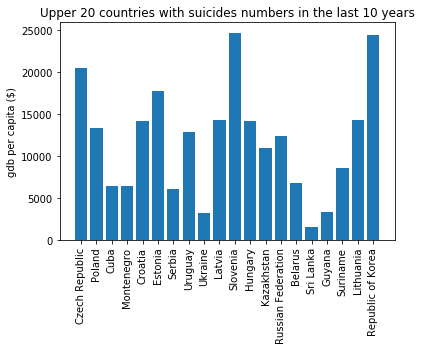

In [56]:
plt.bar(df_suicide_countries_gdb_last_10['country'].iloc[53:],df_suicide_countries_gdb_last_10['gdp_per_capita ($)'].iloc[53:])
plt.xticks(rotation=90)
plt.ylabel('gdb per capita ($)')
plt.title('Upper 20 countries with suicides numbers in the last 10 years')

Text(0.5, 1.0, 'Lower 20 countries with suicides numbers in the last 10 years')

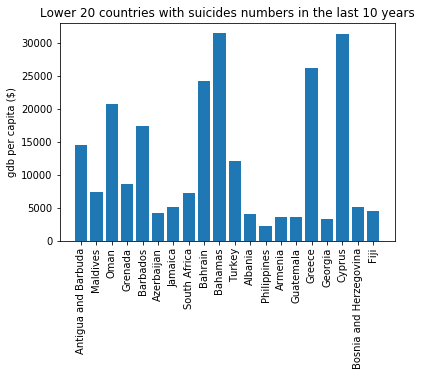

In [57]:
plt.bar(df_suicide_countries_gdb_last_10['country'].iloc[0:20],df_suicide_countries_gdb_last_10['gdp_per_capita ($)'].iloc[0:20])
plt.xticks(rotation=90)
plt.ylabel('gdb per capita ($)')
plt.title('Lower 20 countries with suicides numbers in the last 10 years')

### For the last Analysis : lets use the 10 years data and divide the countries to four categories:
- low income
- low-middle income
- high- middle income
- high income
#### we will look at the percentages that each category represent in the suicides numbers per 1000 

In [177]:
df_suicide_avg_income = df_suicide_2005.groupby(['country'])['gdp_per_capita ($)'].mean().reset_index().sort_values(by='gdp_per_capita ($)')

In [178]:
n = int(df_suicide_avg_income.shape[0]/4)

In [179]:
df_suicide_avg_income = df_suicide_avg_income.reset_index().drop(columns={'index'})

In [180]:
low_income = list(df_suicide_avg_income['country'].iloc[0:n])
low_mid_income = list(df_suicide_avg_income['country'].iloc[n:n*2])
high_mid_income = list(df_suicide_avg_income['country'].iloc[n*2:n*3])
high_income = list(df_suicide_avg_income['country'].iloc[n*3+1:])

In [181]:
df_suicide_2005.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [182]:
df_suicide_count_avg = df_suicide_2005.groupby(['country'])['suicides/100k pop'].mean().reset_index()

In [183]:
def country_income_status(country):
    if country in low_income:
        return 'low-income'
    if country in low_mid_income:
        return 'low_mid_income'
    if country in high_mid_income:
        return 'high_mid_income'
    if country in high_income:
        return 'high_income'

In [184]:
df_suicide_count_avg['income_status'] = df_suicide_count_avg["country"].apply(country_income_status)

In [185]:
df_income_country = df_suicide_count_avg.groupby(['income_status'])['suicides/100k pop'].mean().reset_index()

In [186]:
df_income_country

,income_status,suicides/100k pop
0,high_income,11.290803
1,high_mid_income,12.649079
2,low-income,8.822270
3,low_mid_income,11.381358


In [187]:
sum_of_sui = df_income_country['suicides/100k pop'].sum()

In [188]:
df_income_country['percentages'] = df_income_country['suicides/100k pop'].apply(lambda x:(x/sum_of_sui)*100)

In [189]:
df_income_country

,income_status,suicides/100k pop,percentages
0,high_income,11.290803,25.577492
1,high_mid_income,12.649079,28.654447
2,low-income,8.822270,19.985429
3,low_mid_income,11.381358,25.782632


In [190]:
df_income_country = df_income_country.sort_values(by=['percentages'])

Text(0, 0.5, 'Percentage of suicides in 1000 pop')

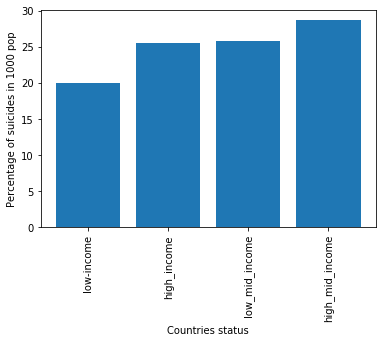

In [191]:
plt.bar(df_income_country['income_status'],df_income_country['percentages'])
plt.xticks(rotation=90)
plt.xlabel('Countries status')
plt.ylabel('Percentage of suicides in 1000 pop')

- The differnce in percentages between the groups income countries is not significant , however, an interesting insight is that low-income countries have the lowest percentage in suicides compared to the rest